<a href="https://colab.research.google.com/github/Ibteda-Hafiz/Olympic_Data_Analysis/blob/main/Olympics_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/Summer-Olympic-medals-1976-to-2008.csv', encoding='latin-1')

In [ ]:
print(df.head())

       City    Year     Sport Discipline           Event  \
0  Montreal  1976.0  Aquatics     Diving  3m springboard   
1  Montreal  1976.0  Aquatics     Diving  3m springboard   
2  Montreal  1976.0  Aquatics     Diving  3m springboard   
3  Montreal  1976.0  Aquatics     Diving  3m springboard   
4  Montreal  1976.0  Aquatics     Diving    10m platform   

                    Athlete Gender Country_Code        Country Event_gender  \
0           KÖHLER, Christa  Women          GDR   East Germany            W   
1       KOSENKOV, Aleksandr    Men          URS   Soviet Union            M   
2      BOGGS, Philip George    Men          USA  United States            M   
3  CAGNOTTO, Giorgio Franco    Men          ITA          Italy            M   
4    WILSON, Deborah Keplar  Women          USA  United States            W   

    Medal  
0  Silver  
1  Bronze  
2    Gold  
3  Silver  
4  Bronze  


In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB
None
               Year
count  15316.000000
mean    1993.620789
std       10.159851
min     1976.000000
25%     1984.000000
50%     1996.000000
75%     2004.000000
max     2008.000000


**DATA CLEANING**

In [ ]:
df.dropna(inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 15316 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.4+ MB
None


**EXPLORATORY DATA ANALYSIS(EDA):**


1) TOTAL MEDAL COUNT BY COUNTRY

In [ ]:
medal_count_by_country = df['Country'].value_counts().reset_index()
medal_count_by_country.columns = ['Country', 'Medal_Count']
display(medal_count_by_country)

,Country,Medal_Count
0,United States,1992
1,Soviet Union,1021
2,Australia,798
3,Germany,691
4,China,679
...,...,...
122,Panama,1
123,Mauritius,1
124,Sudan,1
125,Togo,1


2) MEDALS WON OVER THE YEARS

In [ ]:
medals_over_the_years = df['Year'].value_counts().sort_index().reset_index()
medals_over_the_years.columns = ['Year', 'Medal_Count']
display(medals_over_the_years)

,Year,Medal_Count
0,1976.0,1305
1,1980.0,1387
2,1984.0,1459
3,1988.0,1546
4,1992.0,1705
5,1996.0,1859
6,2000.0,2015
7,2004.0,1998
8,2008.0,2042


3) GENDER DISTRIBUTION IN EVENTS

In [ ]:
gender_distribution = df['Gender'].value_counts().reset_index()
gender_distribution.columns = ['Gender', 'Count']
display(gender_distribution)

,Gender,Count
0,Men,9388
1,Women,5928


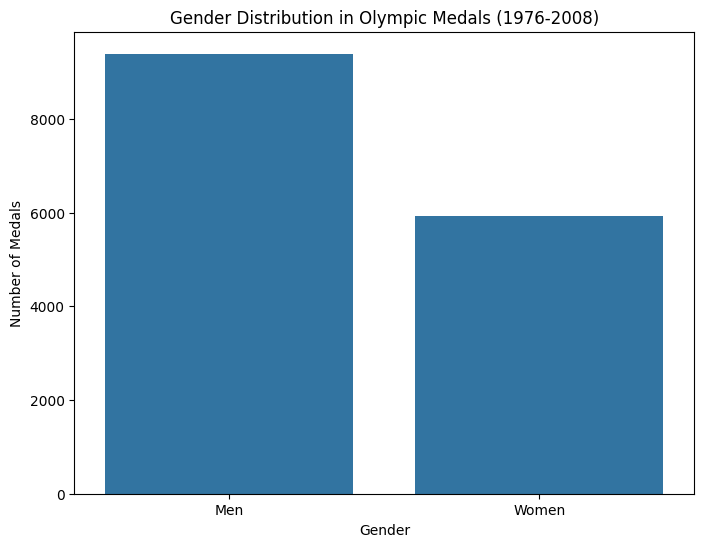

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Count', data=gender_distribution)
plt.title('Gender Distribution in Olympic Medals (1976-2008)')
plt.xlabel('Gender')
plt.ylabel('Number of Medals')
plt.show()

4) TOP ATHLETES WITH MOST MEDALS

In [ ]:
athlete_medal_counts = df['Athlete'].value_counts().reset_index()
athlete_medal_counts.columns = ['Athlete', 'Medal_Count']
top_athletes = athlete_medal_counts.head(10)  # Display top 10 athletes
display(top_athletes)

,Athlete,Medal_Count
0,"PHELPS, Michael",16
1,"NEMOV, Alexei",12
2,"FISCHER, Birgit",12
3,"TORRES, Dara",12
4,"ANDRIANOV, Nikolay",12
5,"THOMPSON, Jenny",12
6,"BIONDI, Matthew",11
7,"COUGHLIN, Natalie",11
8,"SCHERBO, Vitaly",10
9,"LEWIS, Carl",10


5) MEDALS COUNT BY COUNTRY AND YEAR

In [ ]:
country_year_medal_counts = df.groupby(['Country', 'Year']).size().reset_index(name='Medal_Count')
display(country_year_medal_counts)

,Country,Year,Medal_Count
0,Afghanistan,2008.0,1
1,Algeria,1984.0,2
2,Algeria,1992.0,2
3,Algeria,1996.0,3
4,Algeria,2000.0,5
...,...,...,...
554,Zambia,1984.0,1
555,Zambia,1996.0,1
556,Zimbabwe,1980.0,16
557,Zimbabwe,2004.0,3


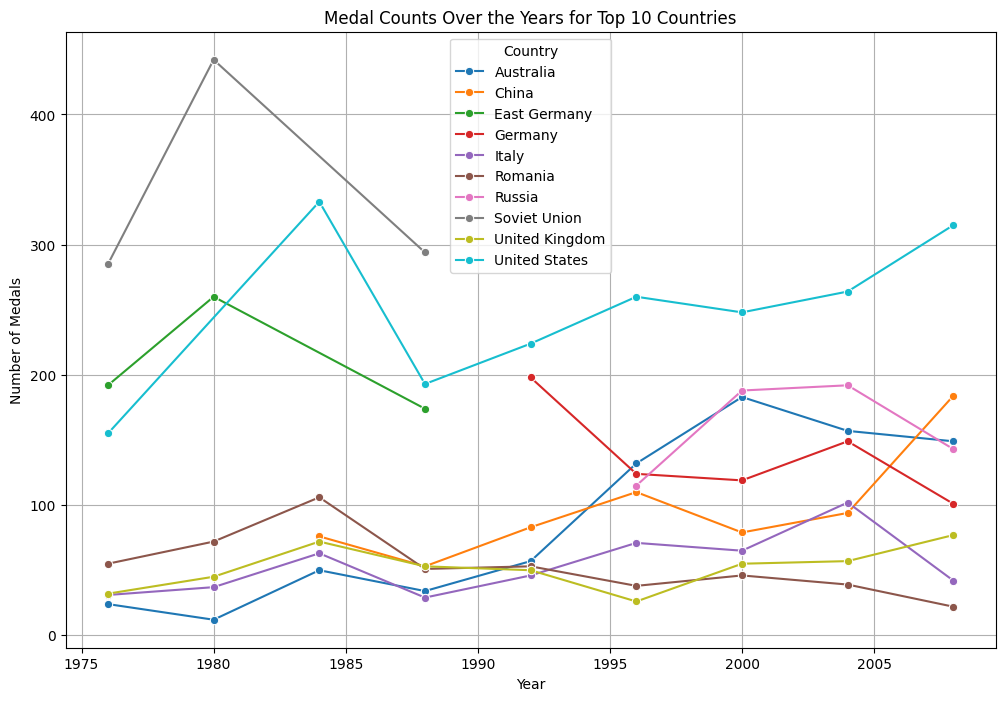

In [ ]:
top_countries = medal_count_by_country.head(10)['Country'].tolist()
top_countries_performance = country_year_medal_counts[country_year_medal_counts['Country'].isin(top_countries)]

plt.figure(figsize=(12, 8))
sns.lineplot(data=top_countries_performance, x='Year', y='Medal_Count', hue='Country', marker='o')
plt.title('Medal Counts Over the Years for Top 10 Countries')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.grid(True)
plt.legend(title='Country')
plt.show()

This line plot visualizes the trend of medal counts over the years for the top 10 countries with the most medals in the dataset. Each colored line represents a country, and the markers indicate the number of medals won in each Olympic year from 1976 to 2008. The y-axis shows the number of medals, and the x-axis shows the Olympic year. The plot helps in understanding the performance trajectory of these top countries over time.